In [1]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
fashion = keras.datasets.fashion_mnist
(trainX, trainY), (testX, testY) = fashion.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
def whatIs(label):
  if label==0:
    return "T-shirt/top"
  elif label ==1:
    return "Trouser/pantolon"
  elif label== 2: 
    return "Pullover/kazak"
  elif label== 3:
    return "Dress/Elbise"
  elif label== 4:
    return "Coat/Mont"
  elif label== 5:
    return "Sandal"
  elif label== 6:
    return "Shirt/Gomlek"
  elif label== 7:
    return "Sneaker/Ayakkabı"
  elif label== 8:
    return "Bag/Canta"
  elif label== 9:
    return "Ankle Boot/Yarım Bot"

0 T-shirt/top


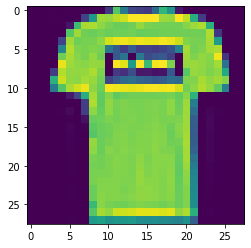

In [5]:
plt.imshow(trainX[1])
print(trainY[1], whatIs(trainY[1]))

In [6]:
#normalizing data between (0-1)
trainX = trainX / 255
testX = testX / 255

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [8]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics= ['accuracy'] )

model.fit(trainX,trainY,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4981 - accuracy: 0.8231
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3739 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3390 - accuracy: 0.8757
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3129 - accuracy: 0.8839
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2934 - accuracy: 0.8920


In [9]:
classifications = model.predict(testX)
print(classifications[1])
print(testY[1])

[2.74214672e-05 3.65447335e-08 9.97674167e-01 5.47087282e-08
 9.79176839e-04 8.42594833e-14 1.31896848e-03 6.42100737e-16
 1.09697524e-07 5.71417100e-14]
2


Pullover/kazak


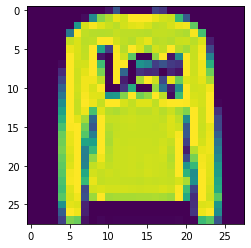

In [10]:
plt.imshow(testX[1])
print(whatIs(testY[1]))

Lets see what will be the effect of changing number of neurons from 128 to 1024

In [11]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer=keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics= ['accuracy'] )

model.fit(trainX,trainY,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4711 - accuracy: 0.8309
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3569 - accuracy: 0.8684
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3217 - accuracy: 0.8820
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2981 - accuracy: 0.8909
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2785 - accuracy: 0.8964


Obviously it took long time to compile since we increased complexity. Even in 5 epochs change can be easily observed.

In [12]:
classifications = model.predict(testX)
print(classifications[1])
print(testY[1])

[1.0440973e-05 4.6317347e-12 9.9972683e-01 1.0600261e-08 8.9287263e-05
 4.7083209e-11 1.7342893e-04 2.0019541e-15 7.5123785e-10 9.3511920e-11]
2


And prediction of testX[1]is more accurate than first model as it is seen. Classification results were expecting label 1 in the first model. Now it is 2 with probability of 9.2

In [13]:
#in this cell we will observe effect of adding a new hidden layer
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer=keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics= ['accuracy'] )

model.fit(trainX,trainY,epochs=5)    
classifications = model.predict(testX)
print(classifications[1])
print(testY[1])                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4647 - accuracy: 0.8290
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3558 - accuracy: 0.8693
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3222 - accuracy: 0.8799
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2968 - accuracy: 0.8892
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2791 - accuracy: 0.8952
[8.9488101e-05 3.1439972e-11 9.9864334e-01 5.2678877e-07 6.4474519e-04
 3.3561226e-13 6.2195025e-04 1.5383747e-13 2.7379786e-11 1.3502621e-12]
2


In [14]:
results = model.evaluate(testX, testY, batch_size=128)
print("test loss, test acc:", results)

79/79 [==============================] - 1s 5ms/step - loss: 0.3334 - accuracy: 0.8792
test loss, test acc: [0.33335059881210327, 0.8791999816894531]


Compiling time was longer,<p>
accuracy over test data is .879<p>
Data is small but maybe with larger data it would give better result

In [15]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=5, callbacks=[callbacks])


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4773 - accuracy: 0.8286
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3589 - accuracy: 0.8691
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3222 - accuracy: 0.8821
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2996 - accuracy: 0.8887
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2826 - accuracy: 0.8943
